**EV Market Analysis**

**Question:**
How you recommend second hand bikes to the persons who are intrested in buying second hand bikes

In [ ]:
# Importing the necessary libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the dataset for analysing the families who can intrested to purchase bike
data=pd.read_csv('/content/bike_buyers_clean.csv')
data = data.drop(columns=['Region','Commute Distance'])
data = data.rename(columns={'Purchased Bike': 'intrested to Purchase Bike'})
data.head(5)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Age,intrested to Purchase Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,36,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1000 non-null   int64 
 1   Marital Status              1000 non-null   object
 2   Gender                      1000 non-null   object
 3   Income                      1000 non-null   int64 
 4   Children                    1000 non-null   int64 
 5   Education                   1000 non-null   object
 6   Occupation                  1000 non-null   object
 7   Home Owner                  1000 non-null   object
 8   Cars                        1000 non-null   int64 
 9   Age                         1000 non-null   int64 
 10  intrested to Purchase Bike  1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
#Describing the given dataset
data.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


**Data-Preprocessing**


In [ ]:
#checking the null values in the dataset
data.isnull().sum()

ID                            0
Marital Status                0
Gender                        0
Income                        0
Children                      0
Education                     0
Occupation                    0
Home Owner                    0
Cars                          0
Age                           0
intrested to Purchase Bike    0
dtype: int64

**Differenticiate the features based on the datatype**

In [ ]:
# differenticiate the features based on the datatype
discrete_count_features=[]
categorical_features=[]
for i in data.columns:
    if data[i].dtypes=='int64':
        discrete_count_features.append(i)
    elif data[i].dtypes=='object':
        categorical_features.append(i)
print('categorical features: ',categorical_features)
print('discrete count features: ',discrete_count_features)

categorical features:  ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'intrested to Purchase Bike']
discrete count features:  ['ID', 'Income', 'Children', 'Cars', 'Age']


In [ ]:
# check the categorical features with their value counts
for i in categorical_features:
    print('\n',f'====== {i} ======')
    print('Total count: ',len(data))
    print(data[i].value_counts())


 ====== Marital Status ======
Total count:  1000
Marital Status
Married    539
Single     461
Name: count, dtype: int64

 ====== Gender ======
Total count:  1000
Gender
Male      509
Female    491
Name: count, dtype: int64

 ====== Education ======
Total count:  1000
Education
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: count, dtype: int64

 ====== Occupation ======
Total count:  1000
Occupation
Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: count, dtype: int64

 ====== Home Owner ======
Total count:  1000
Home Owner
Yes    685
No     315
Name: count, dtype: int64

 ====== intrested to Purchase Bike ======
Total count:  1000
intrested to Purchase Bike
No     519
Yes    481
Name: count, dtype: int64


In [ ]:
# check the categorical features with their value counts
for j in discrete_count_features:
    print('\n',f'====== {j} ======')
    print('Total count: ',len(data))
    print(data[j].value_counts())


 ====== ID ======
Total count:  1000
ID
12496    1
22252    1
19133    1
24643    1
21599    1
        ..
15926    1
14554    1
16468    1
19174    1
12121    1
Name: count, Length: 1000, dtype: int64

 ====== Income ======
Total count:  1000
Income
60000     166
40000     153
30000     134
70000     123
80000      91
20000      77
10000      74
50000      40
90000      38
130000     32
100000     29
120000     17
110000     16
150000      4
160000      3
170000      3
Name: count, dtype: int64

 ====== Children ======
Total count:  1000
Children
0    277
2    210
1    170
3    135
4    127
5     81
Name: count, dtype: int64

 ====== Cars ======
Total count:  1000
Cars
2    345
1    267
0    243
3     85
4     60
Name: count, dtype: int64

 ====== Age ======
Total count:  1000
Age
40    41
47    39
36    38
43    37
38    37
35    36
42    34
37    33
32    33
45    31
34    31
48    30
41    28
46    27
44    27
30    26
31    25
52    25
53    24
27    23
49    23
50    23
39    22


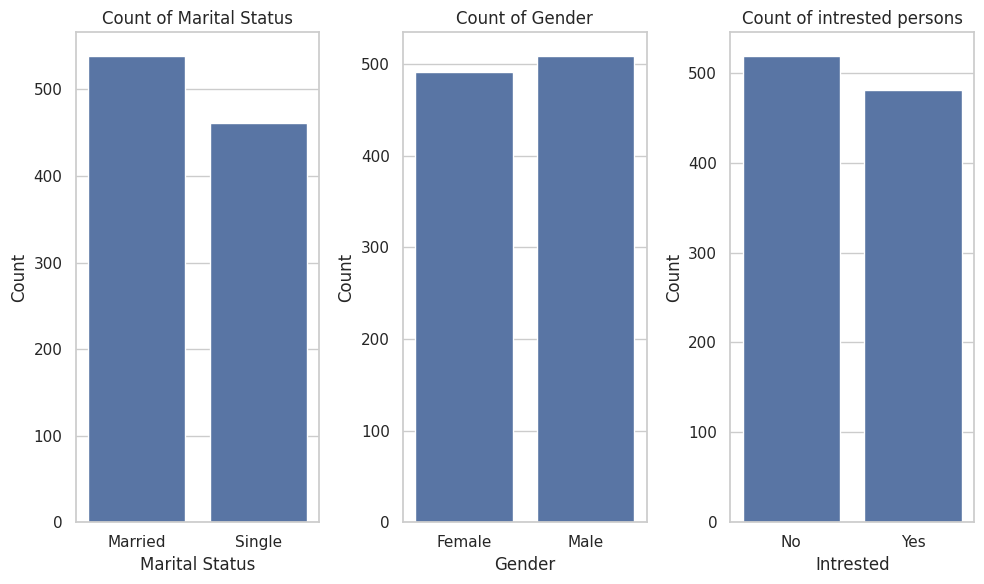

In [ ]:
# Set up the visual style
sns.set(style="whitegrid")

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Plot the count of maritalstatus
sns.countplot(x='Marital Status', data=data, ax=axs[0])
axs[0].set_title('Count of Marital Status')
axs[0].set_xlabel('Marital Status')
axs[0].set_ylabel('Count')

# Plot the count of gender
sns.countplot(x='Gender', data=data, ax=axs[1])
axs[1].set_title('Count of Gender')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')

#plot the count of intrested people to purchase bike
sns.countplot(x='intrested to Purchase Bike', data=data, ax=axs[2])
axs[2].set_title('Count of intrested persons')
axs[2].set_xlabel('Intrested')
axs[2].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()

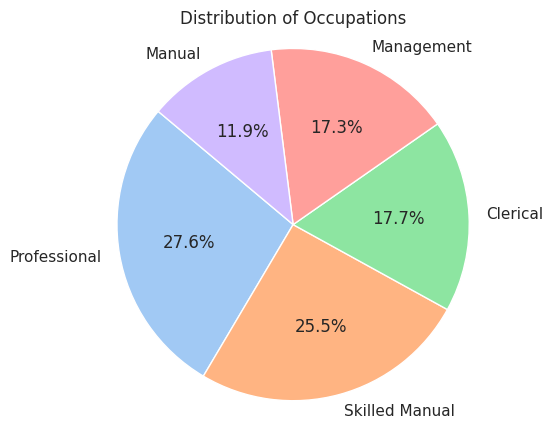

In [ ]:
# Count the occurrences of each occupation
occupation_counts = data['Occupation'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Occupations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The insights were from the pie chart are:


*   Professional and skilled manual are about 50 percent are there




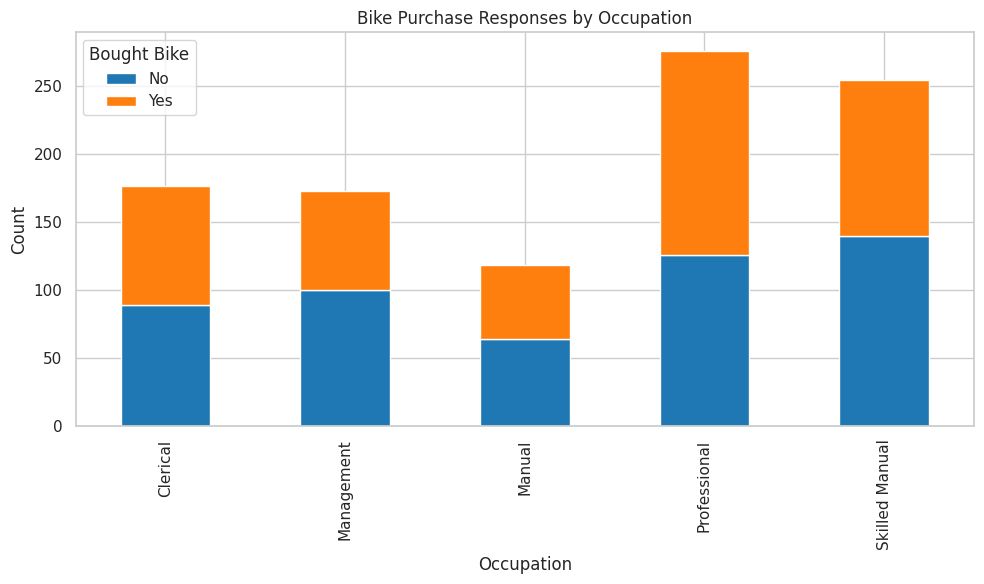

In [ ]:
# Group by occupation and buy_bike and count the occurrences
grouped = data.groupby(['Occupation', 'intrested to Purchase Bike']).size().unstack()

# Plot the bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Bike Purchase Responses by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Bought Bike')
plt.tight_layout()

The insights were drawn from the above graph are:


*   Many people are showing more intrest to buy bikes across all professions
*   But in skilled manual less number of peoples are intresting to buy bikes



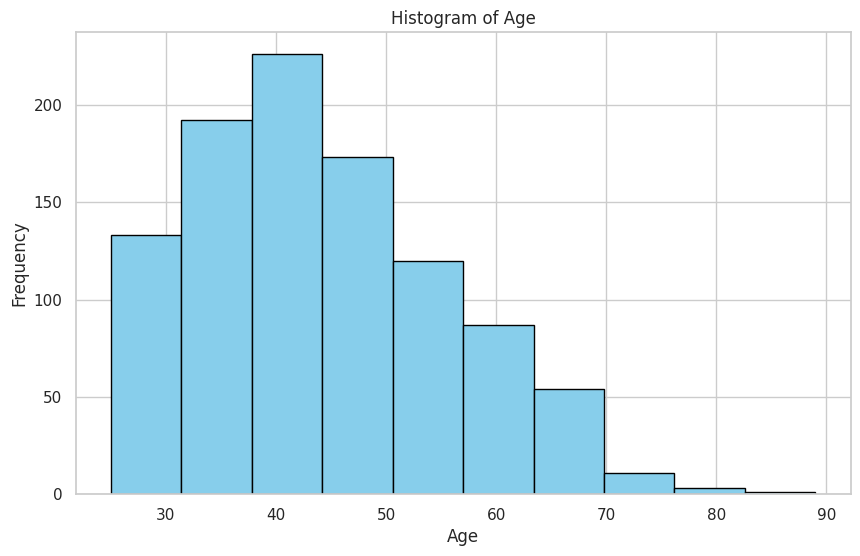

In [ ]:
# Plotting the histogram to describe the distribution of age
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=10, edgecolor='black', color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)  # Add gridlines for better readability
plt.show()

From the above graph we can say that 35-45 age group people were showing much intrest to buying the motor cycles whether it is new or old

**Using Ordinal Encoder for Ordinal Features**

In [ ]:
#Import the necessary libraries
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()


In [ ]:
# Define the ordinal features to be encoded
ordinal_features = ['Education', 'Occupation']
# Fit and transform the specific ordinal features
data[ordinal_features] = encoder.fit_transform(data[ordinal_features])



In [ ]:
data.head(5)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Age,intrested to Purchase Bike
0,12496,Married,Female,40000,1,0.0,4.0,Yes,0,42,No
1,24107,Married,Male,30000,3,3.0,0.0,Yes,1,43,No
2,14177,Married,Male,80000,5,3.0,3.0,No,2,60,No
3,24381,Single,Male,70000,0,0.0,3.0,Yes,1,41,Yes
4,25597,Single,Male,30000,0,0.0,0.0,No,0,36,Yes


**Using Label Encoder for label Features**

In [ ]:
#Import the necessary libraries
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [ ]:
# Define the label features to be encoded
label_features=['Marital Status','Gender']
# Fit and transform the target labels
data['Marital Status'] = label_encoder.fit_transform(data['Marital Status'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Home Owner'] = label_encoder.fit_transform(data['Home Owner'])
data['intrested to Purchase Bike'] = label_encoder.fit_transform(data['intrested to Purchase Bike'])




In [ ]:
data.head(5)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Age,intrested to Purchase Bike
0,12496,0,0,40000,1,0.0,4.0,1,0,42,0
1,24107,0,1,30000,3,3.0,0.0,1,1,43,0
2,14177,0,1,80000,5,3.0,3.0,0,2,60,0
3,24381,1,1,70000,0,0.0,3.0,1,1,41,1
4,25597,1,1,30000,0,0.0,0.0,0,0,36,1


**Standardization the required features for better performance of the model**

In [ ]:
# Standardize the data (recommended)
Standard_features = data[['Marital Status', 'Gender','intrested to Purchase Bike' , 'Children', 'Education', 'Occupation', 'Home Owner', 'Cars', 'Age','Income']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Standard_features)

**Plotting the Elbow Graph**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

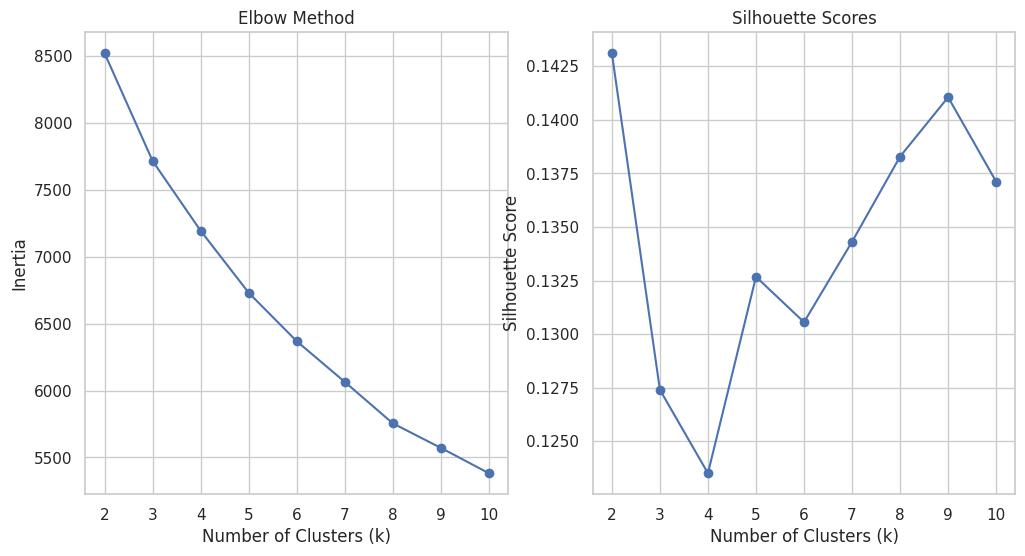

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the Elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.show()



*   From the above graph  we can say that by dividing the data into 9 clusters is absolutely fine




**Applying K-Means Algorithm**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 (Size: 93):
Min values:
ID                            11249.0
Marital Status                    0.0
Gender                            0.0
Income                        70000.0
Children                          0.0
Education                         0.0
Occupation                        1.0
Home Owner                        0.0
Cars                              1.0
Age                              31.0
intrested to Purchase Bike        0.0
Cluster                           0.0
dtype: float64

Max values:
ID                             29301.0
Marital Status                     1.0
Gender                             1.0
Income                        170000.0
Children                           5.0
Education                          4.0
Occupation                         3.0
Home Owner                         1.0
Cars                               4.0
Age                               69.0
intrested to Purchase Bike         1.0
Cluster                            0.0
dtype: float64

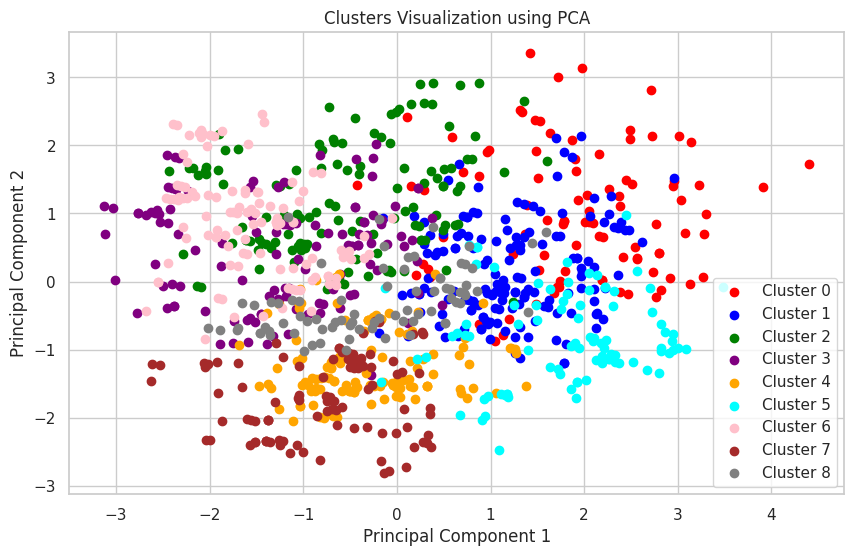

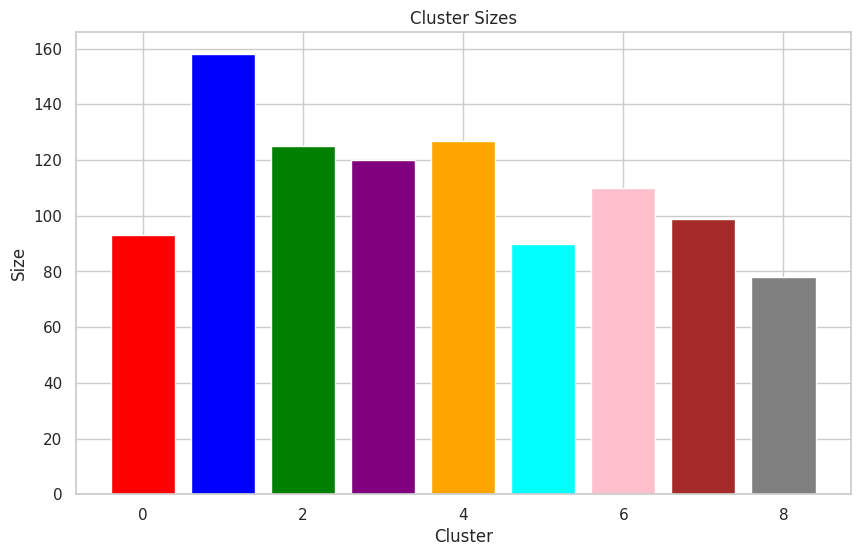

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming data is a DataFrame with the original dataset
# Define useful features
useful_features = data[['Marital Status', 'Gender','intrested to Purchase Bike' , 'Children', 'Education', 'Occupation', 'Home Owner', 'Cars', 'Age','Income']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(useful_features)

# Apply KMeans
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add labels to the DataFrame
data['Cluster'] = labels

# Sort the DataFrame by cluster labels (optional)
sorted_data = data.sort_values(by='Cluster')

# Group the sorted DataFrame by cluster labels and print the groups
grouped = sorted_data.groupby('Cluster')

# Step 5: Calculate and print cluster statistics
for cluster, group in grouped:
    cluster_size = len(group)
    min_values = group.min()
    max_values = group.max()

    print(f'Cluster {cluster} (Size: {cluster_size}):')
    print(f'Min values:\n{min_values}\n')
    print(f'Max values:\n{max_values}\n')

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'pink', 'brown', 'gray']
for cluster in range(n_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', c=colors[cluster])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization using PCA')
plt.legend()
plt.show()

# Plot bar chart for cluster sizes
cluster_sizes = data['Cluster'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(cluster_sizes.index, cluster_sizes.values, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Cluster Sizes')
plt.show()


**Calculating the Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score
# Calculate and print the Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.13142432207790672


**List of Bikes Data**

In [ ]:
# load the dataset for analysing the families who can afford the bike
bikes=pd.read_csv('/content/Used_Bikes.csv')
bikes.head(5)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [ ]:
#Describing the given dataset
bikes.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


**Data-Preprocessing**

In [ ]:
#checking the null values in the dataset
bikes.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [ ]:
useful_features=bikes[['bike_name','price','kms_driven','age','brand']]

In [ ]:
# check the Considered features with their value counts
for i in useful_features:
    print('\n',f'====== {i} ======')
    print('Total count: ',len(data))
    print(bikes[i].value_counts())


 ====== bike_name ======
Total count:  1000
bike_name
Bajaj Pulsar 150cc                                   2776
Bajaj Avenger Street 220                             2531
Bajaj Avenger 220cc                                  2060
Royal Enfield Classic 350cc                          1673
Hero Passion Pro 100cc                               1432
                                                     ... 
Indian Chief Classic 1800cc                             1
TVS Apache RTR 160cc White Race Edition Rear Disc       1
Triumph Bonneville T100 900cc                           1
Bajaj CT110 ES Alloy                                    1
Yamaha FZS FI 150cc Special Edition                     1
Name: count, Length: 471, dtype: int64

 ====== price ======
Total count:  1000
price
25000.0     2071
35000.0     1446
70000.0     1358
18000.0     1356
32000.0     1350
            ... 
73700.0        1
104300.0       1
115204.0       1
386000.0       1
61483.0        1
Name: count, Length: 1232, dtype: 

**Data Analysis**

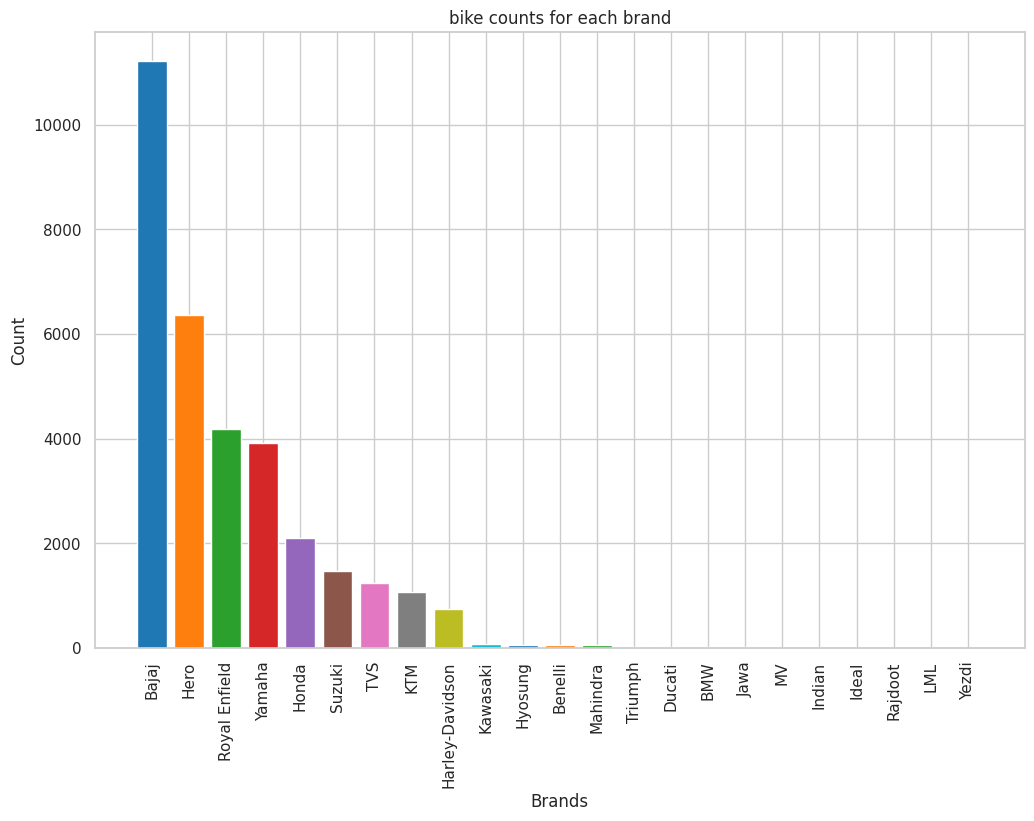

In [ ]:
# Count occurrences of each unique value in the column
value_counts = bikes['brand'].value_counts()

# Plotting the column chart
plt.figure(figsize=(12, 8))  # Wider figure size
plt.bar(value_counts.index, value_counts.values, color=plt.get_cmap('tab10').colors)
plt.xlabel('Brands')
plt.ylabel('Count')
plt.title('bike counts for each brand')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Bajaj brand were solding in second hands more

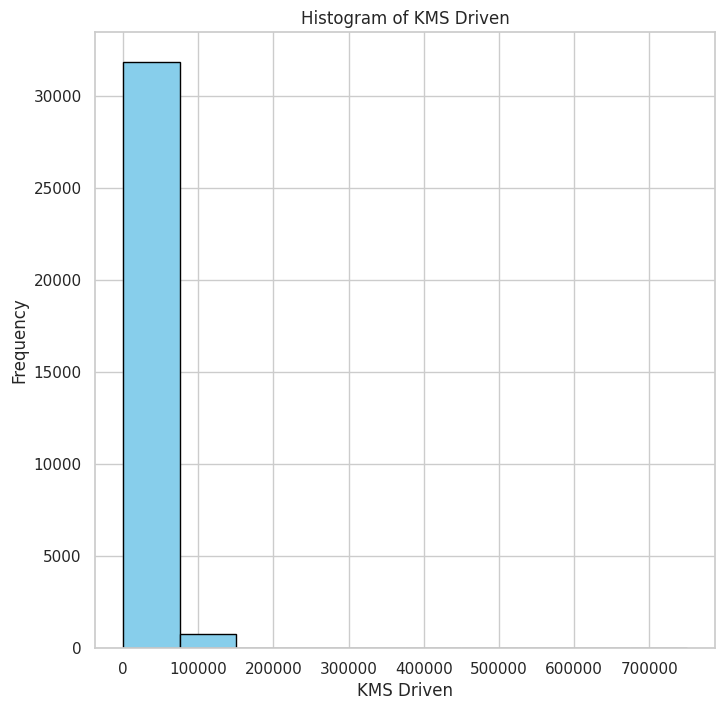

In [ ]:
# Plotting the histogram
plt.figure(figsize=(8, 8))  # Wider figure size
plt.hist(bikes['kms_driven'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('KMS Driven')
plt.ylabel('Frequency')
plt.title('Histogram of KMS Driven')
plt.grid(True)  # Add gridlines for better readability
plt.show()

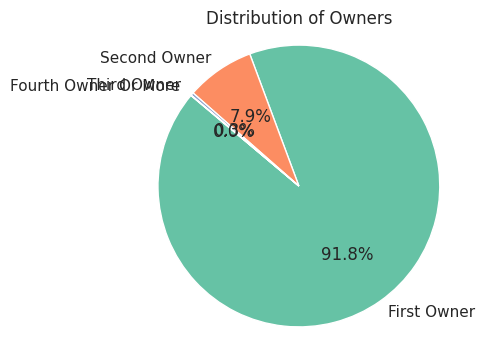

In [ ]:
# Count occurrences of each unique value in the owner column
owner_counts = bikes['owner'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(owner_counts, labels=owner_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('Set2').colors)
plt.title('Distribution of Owners')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Many of the bikes were belong to first hands

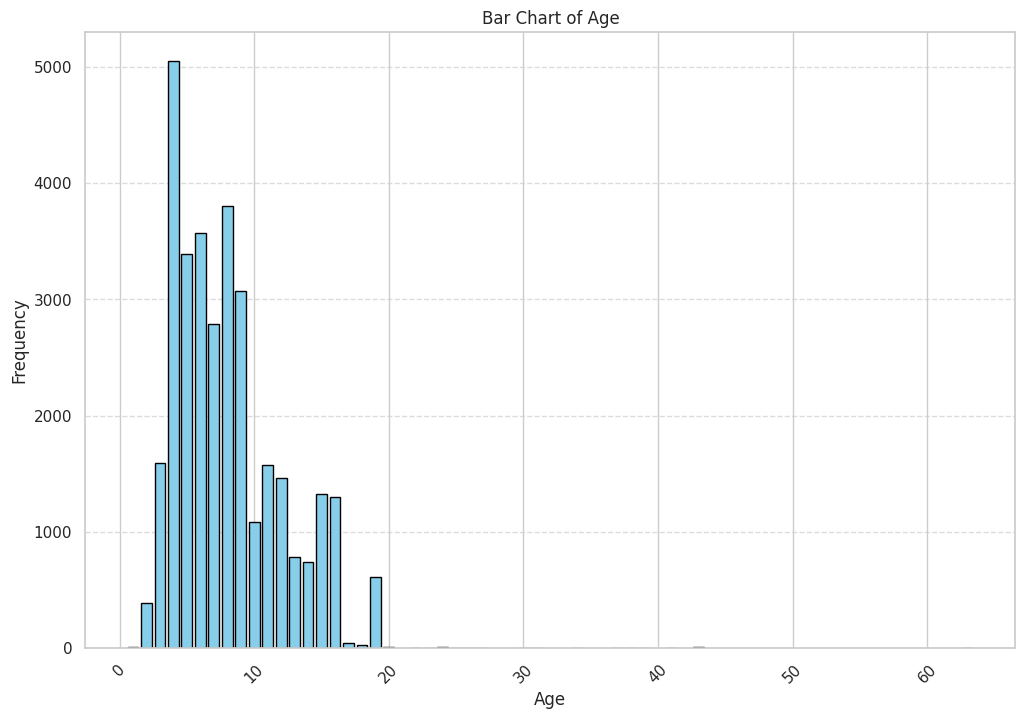

In [ ]:
# Count occurrences of each unique value in the age column
age_counts = bikes['age'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(12, 8))  # Wider figure size
plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Bar Chart of Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

Many of the bikes were again sold within 4 years of bought

**Encoding Techniques**

In [ ]:
#Import the necessary libraries
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()


In [ ]:
# Define the ordinal features to be encoded
ordinal_features = ['owner','brand']
# Fit and transform the specific ordinal features
bikes[ordinal_features] = encoder.fit_transform(bikes[ordinal_features])



In [ ]:
# Define the label features to be encoded
label_features=['bike_name']
# Fit and transform the target labels
bikes['bike_name'] = label_encoder.fit_transform(bikes['bike_name'])



In [ ]:
bikes.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,401,35000.0,Ahmedabad,17654.0,0.0,3.0,110.0,19.0
1,295,119900.0,Delhi,11000.0,0.0,4.0,350.0,17.0
2,411,600000.0,Delhi,110.0,0.0,8.0,675.0,20.0
3,375,65000.0,Bangalore,16329.0,0.0,4.0,180.0,19.0
4,426,80000.0,Bangalore,10000.0,0.0,3.0,150.0,21.0


In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  int64  
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  float64
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Counts:
Cluster
1    13854
2    11160
0     6707
3      927
Name: count, dtype: int64
Silhouette Score: 0.4270
Cluster 0:
Min values:
bike_name          5
price         4400.0
city          Adalaj
kms_driven      23.0
owner            0.0
age              2.0
power          100.0
brand            1.0
Cluster            0
dtype: object

Max values:
bike_name               470
price              250000.0
city          Visakhapatnam
kms_driven         750000.0
owner                   3.0
age                    63.0
power                 500.0
brand                  22.0
Cluster                   0
dtype: object

Cluster 1:
Min values:
bike_name              2
price            10000.0
city          24 Pargana
kms_driven           1.0
owner                0.0
age                  1.0
power              100.0
brand                0.0
Cluster                1
dtype: object

Max values:
bike_name              242
price             273200.0
city          Yamuna Nagar
kms_driven         

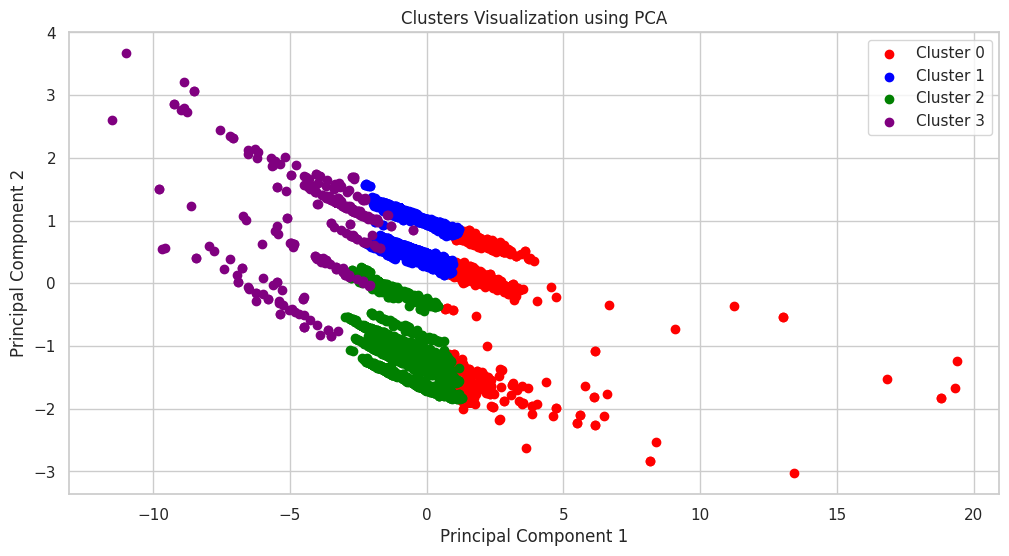

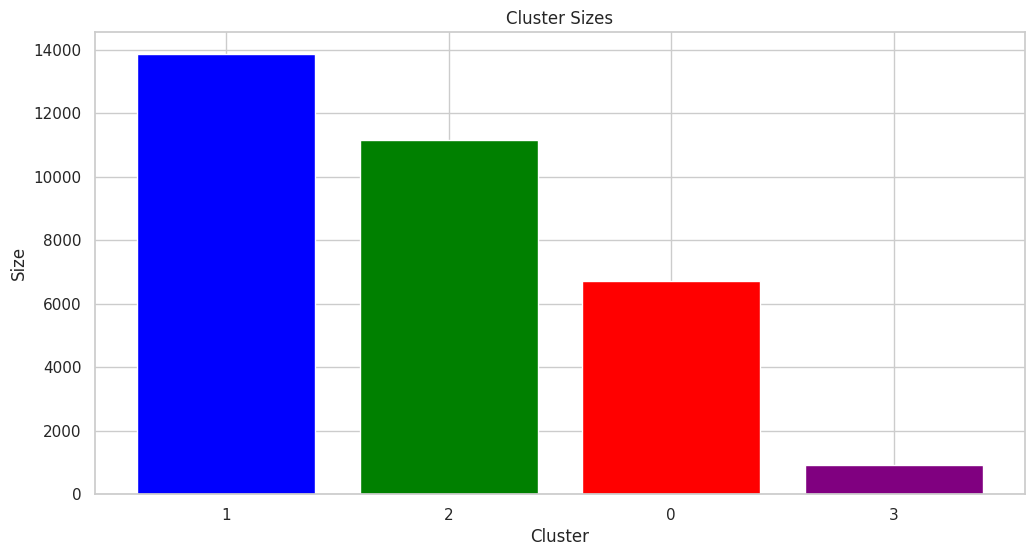

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select useful features and exclude non-numeric columns
useful_features = bikes[['price', 'kms_driven', 'age', 'brand']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(useful_features)

# Apply KMeans
n_clusters = 4  # Choose the number of clusters (you can change this value)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
bikes['Cluster'] = clusters

# Print the number of points in each cluster
cluster_counts = bikes['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Calculate and print silhouette score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Print the statistics for each cluster
grouped = bikes.groupby('Cluster')
for cluster, group in grouped:
    print(f'Cluster {cluster}:')
    min_values = group.min()
    max_values = group.max()
    print(f'Min values:\n{min_values}\n')
    print(f'Max values:\n{max_values}\n')

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(12, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'pink', 'brown', 'gray', 'black']  # Add more colors if needed
for cluster in set(clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', c=colors[cluster % len(colors)])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization using PCA')
plt.legend()
plt.show()

# Plot bar chart for cluster sizes
plt.figure(figsize=(12, 6))
plt.bar(cluster_counts.index.astype(str), cluster_counts.values, color=[colors[i % len(colors)] for i in cluster_counts.index])
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Cluster Sizes')
plt.show()


**Silhoutee Score**

In [ ]:
silhouette_avg = silhouette_score(useful_features, clusters)
silhouette_avg

0.1036416532611916

From the Analysis,


*   I recommend cluster of second hand bikes to the clusters of interested people as follows:


1.   Cluster:0- Clusters of Intrested Peoples(1,3,5,6,7)
2.   Cluster:1- For this cluster we can recommend all clusters of intrested people
3. Cluster:2- for this cluster we can recommend only 2nd cluster of intrested people
4.Cluster:3- Clusters of Intrested Peoples(2,7)


Here the recommendation of second handed bikes to the intrested people mainly bases on their income of the intrested people and their features.

==> Grouping the clusters in both based on their features only
